In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import moviepy.editor as mp
import pathlib
import subprocess
import time
from annotations import add_video_annotations


## Annotations comparison

In [106]:
filename_annotations = 'https://docs.google.com/spreadsheets/d/1Rqu1sJiD-ogc4a6R491JTiaYacptOTqh6DKqhwTa8NA/gviz/tq?tqx=out:csv&sheet=Template'

df_annotations = pd.read_csv(filename_annotations, header=None).drop([0, 1, 2])
df_annotations = df_annotations.drop([2,3,4,19,20,21,22,23,24,25,26],axis=1)
#df_annotations = df_annotations.drop([0,1,2,3,4,19,20,21,22,23,24,25,26],axis=1)
df_annotations = df_annotations.dropna()
df_annotations[[5,6,7,8,9,10,11,12,13,14,15,16,17,18]] = df_annotations[[5,6,7,8,9,10,11,12,13,14,15,16,17,18]].astype(int)

In [107]:
df_annotations

,0,1,5,6,7,8,9,10,11,12,13,14,15,16,17,18
3,Laurent,Video_1,0,0,0,0,1,1,0,0,0,1,0,1,1,0
4,Valentina,Video_1,0,0,0,0,1,0,1,0,0,0,1,0,0,0
5,Aude,WIN_20210323_19_17_40_Pro,1,0,1,1,1,1,1,0,1,1,1,1,1,1
6,Alexandre,WIN_20210323_19_17_40_Pro,0,0,1,1,0,1,1,0,1,1,0,0,0,0
7,Aude,WIN_20210329_10_16_02_Pro,0,0,1,1,0,1,1,0,1,0,0,0,0,1
8,Alexandre,WIN_20210329_10_16_02_Pro,0,0,1,0,0,1,1,0,0,0,0,0,0,0
11,Aude,WIN_20210331_21_22_52_Pro,0,0,0,1,1,0,0,1,0,1,1,0,0,1
12,Valentina,WIN_20210331_21_22_52_Pro,0,0,1,1,0,0,1,1,0,1,1,0,0,0
13,Aude,WIN_20210330_13_10_29_Pro,0,0,0,0,1,0,1,0,0,0,0,0,0,0
14,Vincent,WIN_20210330_13_10_29_Pro,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [108]:
dict_couple_annotateurs = {}
for video in df_annotations[1].unique():
    df_temp = df_annotations.loc[df_annotations[1] == video,[0, 5, 6, 7, 8, 9,10, 11, 12, 13, 14, 15, 16, 17, 18]].sort_values(0).to_numpy()
    #print(df_temp)
    couple_annotateurs = ' vs '.join(df_temp[:,0])
    #print(' vs '.join(df_temp[:,0]))
    #print(df_temp[:,1:])
    #dict_couple_annotateurs[couple_annotateurs] = df_temp[:,1:]
    dict_couple_annotateurs[couple_annotateurs] = np.concatenate([dict_couple_annotateurs.get(couple_annotateurs,[[],[]]), df_temp[:,1:]],axis=1)

In [109]:
dict_couple_annotateurs

{'Laurent vs Valentina': array([[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
         0, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0,
         0, 2, 0, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1,
         1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
         0, 1, 0, 1]], dtype=object),
 'Alexandre vs Aude': array([[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
         0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1],
        [1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
         1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 3, 1, 2]],
       dtype=object),
 'Aude vs Valentina': array([[0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
         0, 1, 1, 0, 0, 0],
        

In [120]:
itemscores = dict_couple_annotateurs['Alexandre vs Vincent']
itemvars = itemscores.var(axis=0, ddof=1)
tscores = itemscores.sum(axis=1)
nitems = len(itemvars)

In [122]:
itemvars

array([0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.5, 0.0], dtype=object)

In [121]:
(nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

-8.296296296296296

In [124]:
def CronbachAlpha(itemscores):
    # cols are items, rows are observations
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = len(itemvars)
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [146]:
for couple, annotations in dict_couple_annotateurs.items():
    print(couple,CronbachAlpha(annotations))
    

Laurent vs Valentina 0.0
Alexandre vs Aude 0.8809756097560976
Aude vs Valentina -1.037037037037037
Aude vs Vincent 0.5185185185185185
Alexandre vs Valentina 0.6649350649350649
Alexandre vs Laurent 0.509090909090909
Laurent vs Vincent -5.566265060240964
Valentina vs Vincent 0.38888888888888884
Alexandre vs Vincent -8.296296296296296


In [147]:
def cronbach_alpha(X):
    num_items = X.shape[1]
    sum_of_item_variances = X.var(axis=0).sum()
    variance_of_sum_of_items = X.sum(axis=1).var()
    return num_items/(num_items - 1)*(1 - sum_of_item_variances/variance_of_sum_of_items)

In [148]:
for couple, annotations in dict_couple_annotateurs.items():
    print(couple,cronbach_alpha(annotations))

Laurent vs Valentina 0.0
Alexandre vs Aude 0.8809756097560976
Aude vs Valentina -1.037037037037037
Aude vs Vincent 0.5185185185185185
Alexandre vs Valentina 0.6649350649350649
Alexandre vs Laurent 0.509090909090909
Laurent vs Vincent -5.566265060240964
Valentina vs Vincent 0.38888888888888884
Alexandre vs Vincent -8.296296296296296


In [158]:
pd.DataFrame(dict_couple_annotateurs['Alexandre vs Vincent'])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,1,1,2,0,1,0,1,2,...,1,1,1,0,1,2,0,0,1,1
1,0,0,2,1,3,0,2,0,1,3,...,1,0,0,0,1,2,0,0,0,1


In [159]:
plt.barplot(dict_couple_annotateurs['Alexandre vs Vincent'][0]);
plt.plot(dict_couple_annotateurs['Alexandre vs Vincent'][1]);

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

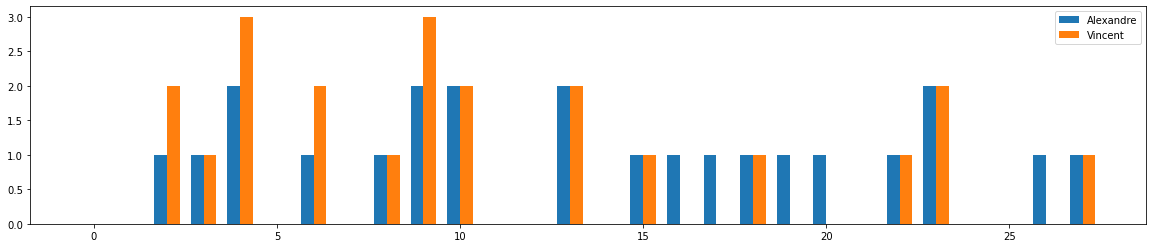

In [166]:
couple_annotateurs = 'Alexandre vs Vincent'
x = np.arange(len(dict_couple_annotateurs[couple_annotateurs][0]))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,4))
rects1 = ax.bar(x - width/2, dict_couple_annotateurs[couple_annotateurs][0], width, label=couple.split()[0])
rects2 = ax.bar(x + width/2, dict_couple_annotateurs[couple_annotateurs][1], width, label=couple.split()[-1])
ax.legend();

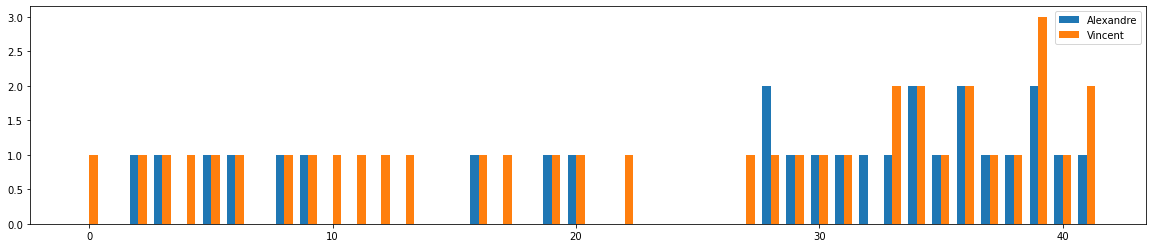

In [167]:
couple_annotateurs = 'Alexandre vs Aude'
x = np.arange(len(dict_couple_annotateurs[couple_annotateurs][0]))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,4))
rects1 = ax.bar(x - width/2, dict_couple_annotateurs[couple_annotateurs][0], width, label=couple.split()[0])
rects2 = ax.bar(x + width/2, dict_couple_annotateurs[couple_annotateurs][1], width, label=couple.split()[-1])
ax.legend();